In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = []
symbol = input('Enter the code for the stock:')
tickers.append(symbol)

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table


Enter the code for the stock:FB


In [ ]:
news_tables

{'FB': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Mar-25-22 03:01PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.marketwatch.com/story/europes-new-big-tech-law-could-actually-produce-results-like-imessage-and-facebook-messenger-playing-nicely-and-big-money-fines-11648234878?siteid=yhoof2" target="_blank">Europes new Big Tech law could actually produce results, like iMessage and Facebook Messenger playing nicely and big-money fines</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> MarketWatch</span></div></div></td></tr>
 <tr><td align="right" width="130">02:47PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/apple-pays-another-round-rare-184718310.html"

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [ ]:

parsed_data[0]

['FB',
 'Mar-25-22',
 '03:01PM\xa0\xa0',
 'Europes new Big Tech law could actually produce results, like iMessage and Facebook Messenger playing nicely and big-money fines']

In [ ]:
import nltk
nltk.download('vader_lexicon')
  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()



In [ ]:
print(df)

   ticker       date       time  \
0      FB  Mar-25-22  03:01PM     
1      FB  Mar-25-22  02:47PM     
2      FB  Mar-25-22  01:30PM     
3      FB  Mar-25-22  12:25PM     
4      FB  Mar-25-22  12:01PM     
..    ...        ...        ...   
95     FB  Mar-18-22  05:00AM     
96     FB  Mar-18-22  01:35AM     
97     FB  Mar-17-22  08:00PM     
98     FB  Mar-17-22  07:41PM     
99     FB  Mar-17-22  07:35PM     

                                                title  
0   Europes new Big Tech law could actually produc...  
1   Apple Pays Another Round of Rare $200,000 Bonu...  
2   Big Tech Blackout Set to Be Averted With EU-U....  
3   Meta (FB) Steps Forward in Metaverse With VNTA...  
4     U.S. Tech Giants Face Tough New Rules in Europe  
..                                                ...  
95         Bear of the Day: Meta Platforms, Inc. (FB)  
96  Meta sued by Australian regulator for allegedl...  
97  Meta Sued by Australian Watchdog Over Scam Cry...  
98  Australian watc

In [ ]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [ ]:
print(df)

   ticker        date       time  \
0      FB  2022-03-25  03:01PM     
1      FB  2022-03-25  02:47PM     
2      FB  2022-03-25  01:30PM     
3      FB  2022-03-25  12:25PM     
4      FB  2022-03-25  12:01PM     
..    ...         ...        ...   
95     FB  2022-03-18  05:00AM     
96     FB  2022-03-18  01:35AM     
97     FB  2022-03-17  08:00PM     
98     FB  2022-03-17  07:41PM     
99     FB  2022-03-17  07:35PM     

                                                title  compound  
0   Europes new Big Tech law could actually produc...    0.7351  
1   Apple Pays Another Round of Rare $200,000 Bonu...    0.5574  
2   Big Tech Blackout Set to Be Averted With EU-U....   -0.0772  
3   Meta (FB) Steps Forward in Metaverse With VNTA...    0.0000  
4     U.S. Tech Giants Face Tough New Rules in Europe   -0.1280  
..                                                ...       ...  
95         Bear of the Day: Meta Platforms, Inc. (FB)    0.0000  
96  Meta sued by Australian regulator f

<Figure size 1080x288 with 0 Axes>

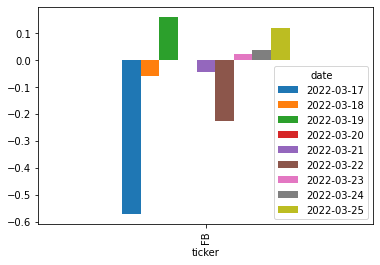

In [ ]:
plt.figure(figsize=(15,4))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.3 MB/s 


In [ ]:
import sweetviz 

In [ ]:
my_report = sweetviz.analyze([df, "EDA"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
"""import pandas as py
import numpy as np
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen

pd.set_option('display.max_colwidth', 25)

# Input
symbol = input('Enter a ticker: ')
print ('Getting data for ' + symbol + '...\n')

# Set up scraper
url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

def get_fundamentals():
    try:
        # Find fundamentals table
        fundamentals = pd.read_html(str(html), attrs = {'class': 'snapshot-table2'})[0]
        
        # Clean up fundamentals dataframe
        fundamentals.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
        colOne = []
        colLength = len(fundamentals)
        for k in np.arange(0, colLength, 2):
            colOne.append(fundamentals[f'{k}'])
        attrs = pd.concat(colOne, ignore_index=True)
    
        colTwo = []
        colLength = len(fundamentals)
        for k in np.arange(1, colLength, 2):
            colTwo.append(fundamentals[f'{k}'])
        vals = pd.concat(colTwo, ignore_index=True)
        
        fundamentals = pd.DataFrame()
        fundamentals['Attributes'] = attrs
        fundamentals['Values'] = vals
        fundamentals = fundamentals.set_index('Attributes')
        return fundamentals

    except Exception as e:
        return e
    
def get_news():
    try:
        # Find news table
        news = pd.read_html(str(html), attrs = {'class': 'fullview-news-outer'})[0]
        links = []
        for a in html.find_all('a', class_="tab-link-news"):
            links.append(a['href'])
        
        # Clean up news dataframe
        news.columns = ['Date', 'News Headline']
        news['Article Link'] = links
        news = news.set_index('Date')
        return news

    except Exception as e:
        return e
print ('Fundamental Ratios: ')
print(get_fundamentals())

print ('\nRecent News: ')
print(get_news())

print ('\nRecent Insider Trades: ')
print(get_insider())"""       

Fundamental Ratios: 
                 Values
Attributes             
Index           S&P 500
Market Cap      508.00B
Income           39.37B
Sales           117.93B
Book/sh           45.18
...                 ...
ATR               11.12
Volatility  3.65% 4.15%
Prev Close       187.61
Price            186.63
Change           -0.52%

[72 rows x 1 columns]

Recent News: 
                              News Headline              Article Link
Date                                                                 
Mar-15-22 01:00AM  Russians bid hasty fa...  https://www.ft.com/cm...
Mar-14-22 08:42PM  UPDATE 1-Facebook own...  https://finance.yahoo...
08:12PM            Facebook Makes a Big ...  https://www.thestreet...
07:33PM            Meta is ending its fr...  https://www.bizjourna...
05:44PM            Facebook owner to hel...  https://finance.yahoo...
...                                     ...                       ...
01:48PM            Russia-Ukraine war: C...  https://finance.yahoo...

In [ ]:
df

,ticker,date,time,title,compound
0,AAPL,2022-03-23,09:52PM,Dow Jones Futures: Stock Market Rally Retreats...,0.0000
1,AAPL,2022-03-23,08:42PM,PRESS DIGEST-Financial Times - March 24,0.0000
2,AAPL,2022-03-23,08:00PM,Apple's Small Fintech Acquisition Could Procee...,0.3818
3,AAPL,2022-03-23,07:28PM,Tim Cook Displays His Difference in Russian In...,0.0000
4,AAPL,2022-03-23,07:21PM,Google Tests Letting Apps Like Spotify Offer O...,0.3612
...,...,...,...,...,...
95,AAPL,2022-03-17,11:05AM,Overlooked and underfunded: How 2-year HBCUs a...,-0.3400
96,AAPL,2022-03-17,10:49AM,Iridium (IRDM) Satcom Adopted by Japan-Based S...,0.0000
97,AAPL,2022-03-17,10:46AM,"Market strategist talks stocks, investing amid...",0.0000
98,AAPL,2022-03-17,10:26AM,Adobe (ADBE) Partners BMW Group for Experience...,0.0000
